Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [59]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility


print(type(X),X.shape)
print(type(y_true),y_true.shape)

k = 5
true_centers = np.array([X[y_true == i].mean(axis=0) for i in range(k)])
print(true_centers)
center_variance = true_centers.var(axis=0)
print(center_variance)

X = StandardScaler().fit_transform(X)

theo_in = sum(1000*1.5**2/(center_variance+1.5**2))
print(theo_in)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)
[[ -1.61420338   4.57265582 -10.08156966  -4.04102655  -6.9675822
   -8.00419644  -6.1503875   -3.12054799  -2.03008904   0.81035899]
 [ -1.72809588   3.84638785  -6.00757693   7.53501651  -9.27782347
    3.33771796  -1.63584575   1.17373974  -7.23474581  -6.03213699]
 [  6.07228515   9.32809101  -3.69571573   3.70377867   7.50272694
    7.94359138  -8.1738286   -9.22840828  -6.53852603   7.54362052]
 [ -7.92957013  -1.53092109   9.18966467   0.75810567   3.7817487
   -3.75841318   3.72552357   6.4251848   -9.72283851   4.98900567]
 [  9.69778782   5.12558214  -4.36025825   5.80138774  -7.84369724
   -0.95261712   8.22288381  -4.15748977  -4.20083432  -7.30267819]]
[39.06860374 12.04760504 42.02319976 16.64054358 46.78992707 30.58601821
 37.11828026 27.79558745  6.93128442 34.43376837]
934.5928213915947


In [60]:
# Inertia
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans.fit(X)
print("Inertia:", kmeans.inertia_)



Inertia: 924.3159961688092


In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment


cm = confusion_matrix(y_true, y_pred)
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
y_pred_aligned = np.array([mapping[label] for label in y_pred])


cm_aligned = confusion_matrix(y_true, y_pred_aligned)
print("Confusion matrix:\n", cm_aligned)

Confusion matrix:
 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


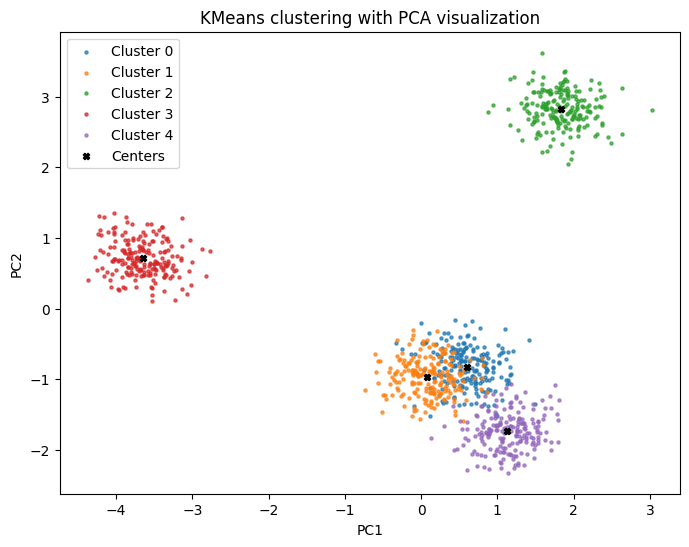

In [64]:
# 2D Visaulization
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
for i in range(5):
    plt.scatter(
        X_pca[y_pred_aligned == i, 0], X_pca[y_pred_aligned == i, 1],
        label=f"Cluster {i}", alpha=0.7, s = 5
    )


plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c="black", marker="X", s=20, label="Centers"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans clustering with PCA visualization")
plt.legend()
plt.show()

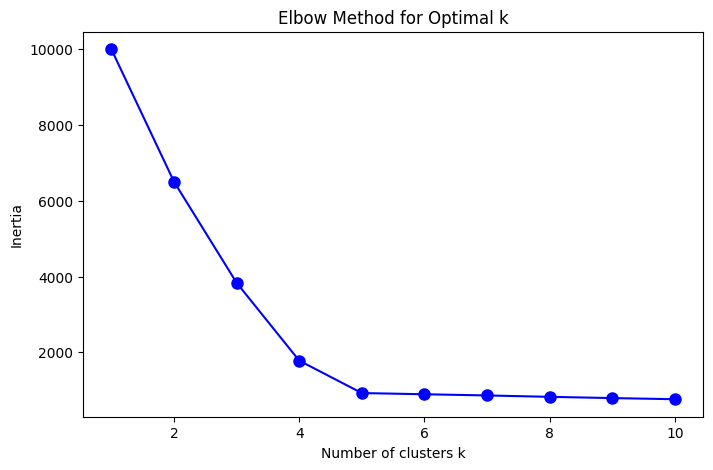

In [5]:
# elbow analysis

inertia_list = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_list, 'bo-', markersize=8)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [67]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


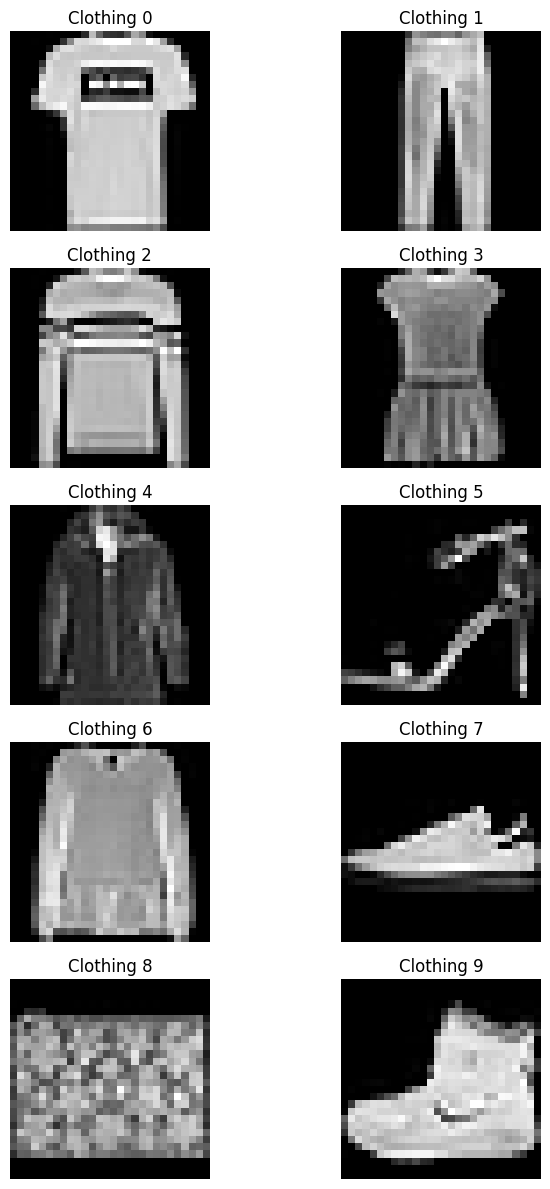

In [68]:
# plot each type of clothing
fig, axes = plt.subplots(5, 2, figsize=(8, 12))

for i in range(10):
    ax = axes[i//2, i%2]
    img_idx = np.where(y == i)[0][0]
    ax.imshow(X[img_idx].reshape(28,28), cmap='gray')
    ax.set_title(f"Clothing {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

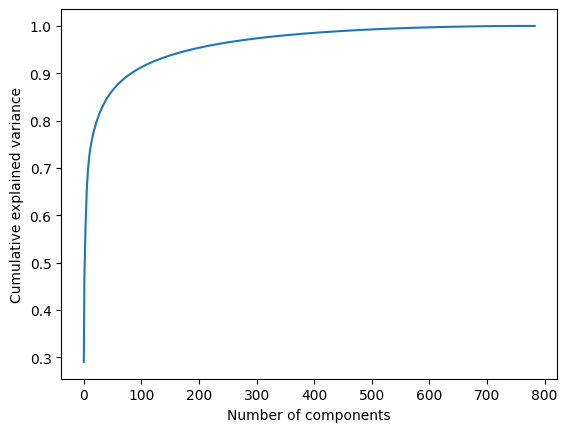

In [69]:
# PCA
pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

X_pca = pca.fit_transform(X)

In [70]:
# Choose n_comp
target_ratios = np.linspace(0.80, 0.95, 16)
n_components_list = []

for r in target_ratios:
    n = np.argmax(cumulative_variance >= r) + 1
    n_components_list.append(n)

print(n_components_list)

[np.int64(24), np.int64(27), np.int64(30), np.int64(34), np.int64(38), np.int64(43), np.int64(49), np.int64(56), np.int64(64), np.int64(73), np.int64(84), np.int64(97), np.int64(113), np.int64(133), np.int64(157), np.int64(188)]


In [71]:
from sklearn.metrics import adjusted_rand_score, silhouette_score


ari_list = []
sil_list = []

for n_comp in n_components_list:
    X_pca_n = X_pca[:, :n_comp]


    kmeans = KMeans(n_clusters=10, n_init=50, random_state=42)
    y_pred = kmeans.fit_predict(X_pca_n)

    ari = adjusted_rand_score(y, y_pred)
    sil = silhouette_score(X_pca_n, y_pred)

    ari_list.append(ari)
    sil_list.append(sil)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(n_components_list, ari_list, marker='o')
plt.xlabel("PCA n_components")
plt.ylabel("ARI")
plt.title("ARI vs PCA Dimension")

plt.subplot(1,2,2)
plt.plot(n_components_list, sil_list, marker='o', color='orange')
plt.xlabel("PCA n_components")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs PCA Dimension")

plt.tight_layout()
plt.show()



KeyboardInterrupt: 

In [ ]:
# Choose n = 113! 92%

X_reduced = pca.transform(X)[:, :113]

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_reduced)

y_pred = kmeans.fit_predict(X_reduced)


In [66]:
# alignment
cm = confusion_matrix(y, y_pred)
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
y_pred_aligned = np.array([mapping[label] for label in y_pred])


plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(
        X_reduced[y_pred_aligned == i, 0], X_reduced[y_pred_aligned == i, 1],
        label=f"Cluster {i}", alpha=0.7, s = 2
    )


plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c="black", marker="X", s=20, label="Centers"
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("87% PCA")
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [70000, 1000]

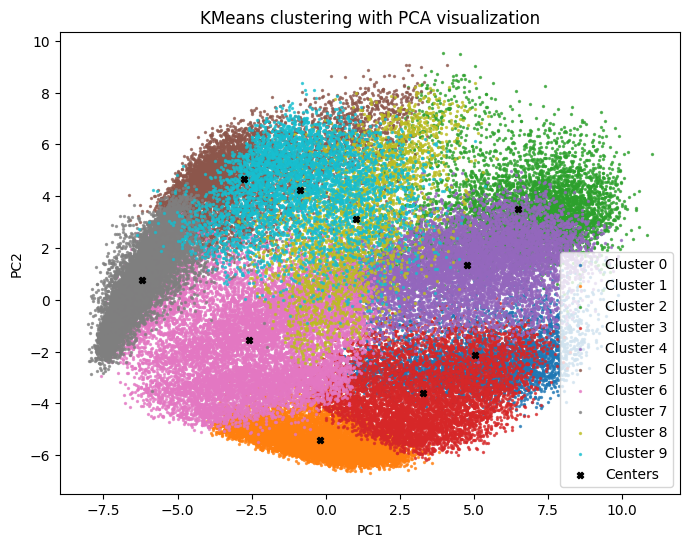

In [18]:
# alignment
cm = confusion_matrix(y, y_pred)
row_ind, col_ind = linear_sum_assignment(-cm)
mapping = dict(zip(col_ind, row_ind))
y_pred_aligned = np.array([mapping[label] for label in y_pred])

plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(
        X_pca[y_pred_aligned == i, 0], X_pca[y_pred_aligned == i, 1],
        label=f"Cluster {i}", alpha=0.7, s = 2
    )


plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1],
    c="black", marker="X", s=20, label="Centers"
)


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans clustering with PCA visualization")
plt.legend()
plt.show()

In [44]:
cm_aligned = confusion_matrix(y, y_pred_aligned)
print("Confusion matrix:\n", cm_aligned)
print("Number of successful predictions: ", np.trace(cm_aligned))
ari = adjusted_rand_score(y, y_pred)
print("ARI: ", ari)

Confusion matrix:
 [[4001  198  216   11   53  503 1985    3   30    0]
 [ 286 6296   28    1   58  145  186    0    0    0]
 [ 102   13 2058   13 2293  473 2014    1   33    0]
 [1988 3625   21    1   70  478  806    0   11    0]
 [ 838  172  998    8 3645  229 1077    0   33    0]
 [   2    1    0  356    0 4640   48 1576   12  365]
 [1225   60 1049   20 1457  730 2432    6   20    1]
 [   0    0    0  749    0  671    0 5545    0   35]
 [  24   19  611 2222   46  470  479  207 2915    7]
 [   4    2    1 2886    2  256   41  250    2 3556]]
Number of successful predictions:  35089
ARI:  0.339501066196792


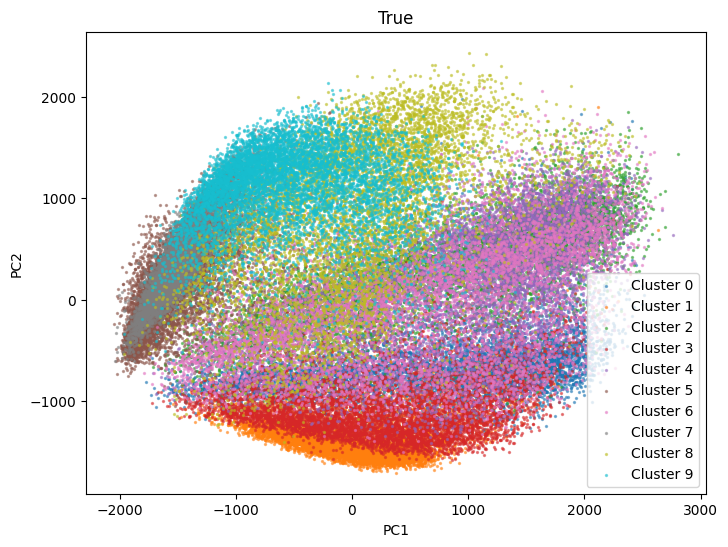

In [40]:
# Real distribution
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1],
        label=f"Cluster {i}", alpha=0.5, s = 2
    )


plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("True")
plt.legend()
plt.show()

In [42]:
import plotly.express as px

color_map = {str(i): px.colors.qualitative.Plotly[i] for i in range(10)}
fig = px.scatter_3d(
    x=X_pca[:,0],
    y=X_pca[:,1],
    z=X_pca[:,2],
    color=y_pred_aligned.astype(str),
    color_discrete_map=color_map,
    title="KMeans Clusters (PCA 3D)"
)
fig.update_traces(marker=dict(size=1))


fig.add_scatter3d(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:,1],
    z=kmeans.cluster_centers_[:,2],
    mode="markers",
    marker=dict(size=1, color="black", symbol="x"),
    name="Centers"
)

fig.show()

In [43]:
fig = px.scatter_3d(
    x=X_pca[:,0],
    y=X_pca[:,1],
    z=X_pca[:,2],
    color=y.astype(str),
    color_discrete_map=color_map,
    title="KMeans Clusters (PCA 3D)"
)
fig.update_traces(marker=dict(size=1))
fig.show()

In [55]:
cm_aligned = confusion_matrix(y, y_pred_aligned)
print("Confusion matrix:\n", cm_aligned)
print("Number of successful predictions: ", np.trace(cm_aligned))
ari = adjusted_rand_score(y, y_pred)
print("ARI: ", ari)

Confusion matrix:
 [[3769   60  171  813   95   12 2039    7   34    0]
 [  15 6018   28  530   82    1  326    0    0    0]
 [  46    6 2232   79 2539   15 2034    2   47    0]
 [ 104 2115   19 3352  119    1 1280    0   10    0]
 [   7   60 1253  965 3673    8  999    0   35    0]
 [   0    0    0    4    0  425 1702 4449   10  410]
 [ 864   25 1107  599 1702   25 2633   10   33    2]
 [   0    0    0    0    0  978    9 5975    0   38]
 [   9    8  599   59   69 2245  752  318 2930   11]
 [   0    1    1   11    7 2931  162  271    2 3614]]
Number of successful predictions:  34621
ARI:  0.33384955299107966


# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here

In [ ]:
#Inertia: 144602409902.74988
# Confusion matrix:
 [[3999  229   27    0  202  670 1837    3   33    0]
 [ 288 6307    3    0   72  173  157    0    0    0]
 [ 136   13   30    1 4090  562 2137    1   30    0]
 [1962 3712    7    0   59  609  641    0   10    0]
 [1016  182   19    0 4223  289 1237    0   34    0]
 [   2    1    4  298    0 4435   36 1669   13  542]
 [1248   72   76    1 2270  874 2436    6   17    0]
 [   0    0    1   24    0  574    0 5490    0  911]
 [  26   32 2555    7  336  568  281  277 2855   63]
 [   2    2    4 3016    1  199   38  203    2 3533]]